In [1]:
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [2]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description LIKE('%REQUIREMENT%');
        """
doc_ids, corpus_full = get_query_corpus(query, True)
corpus = np.array([extract_requirements(doc) for doc in corpus_full])

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8839 documents loaded!


In [ ]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
# tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

In [13]:
nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max(axis = 0)
print(W_max.shape)
W_normalized = W / W_max

Loading ../output/NMF.pkl from cache...
 -> ../output/NMF.pkl loaded!
(50,)


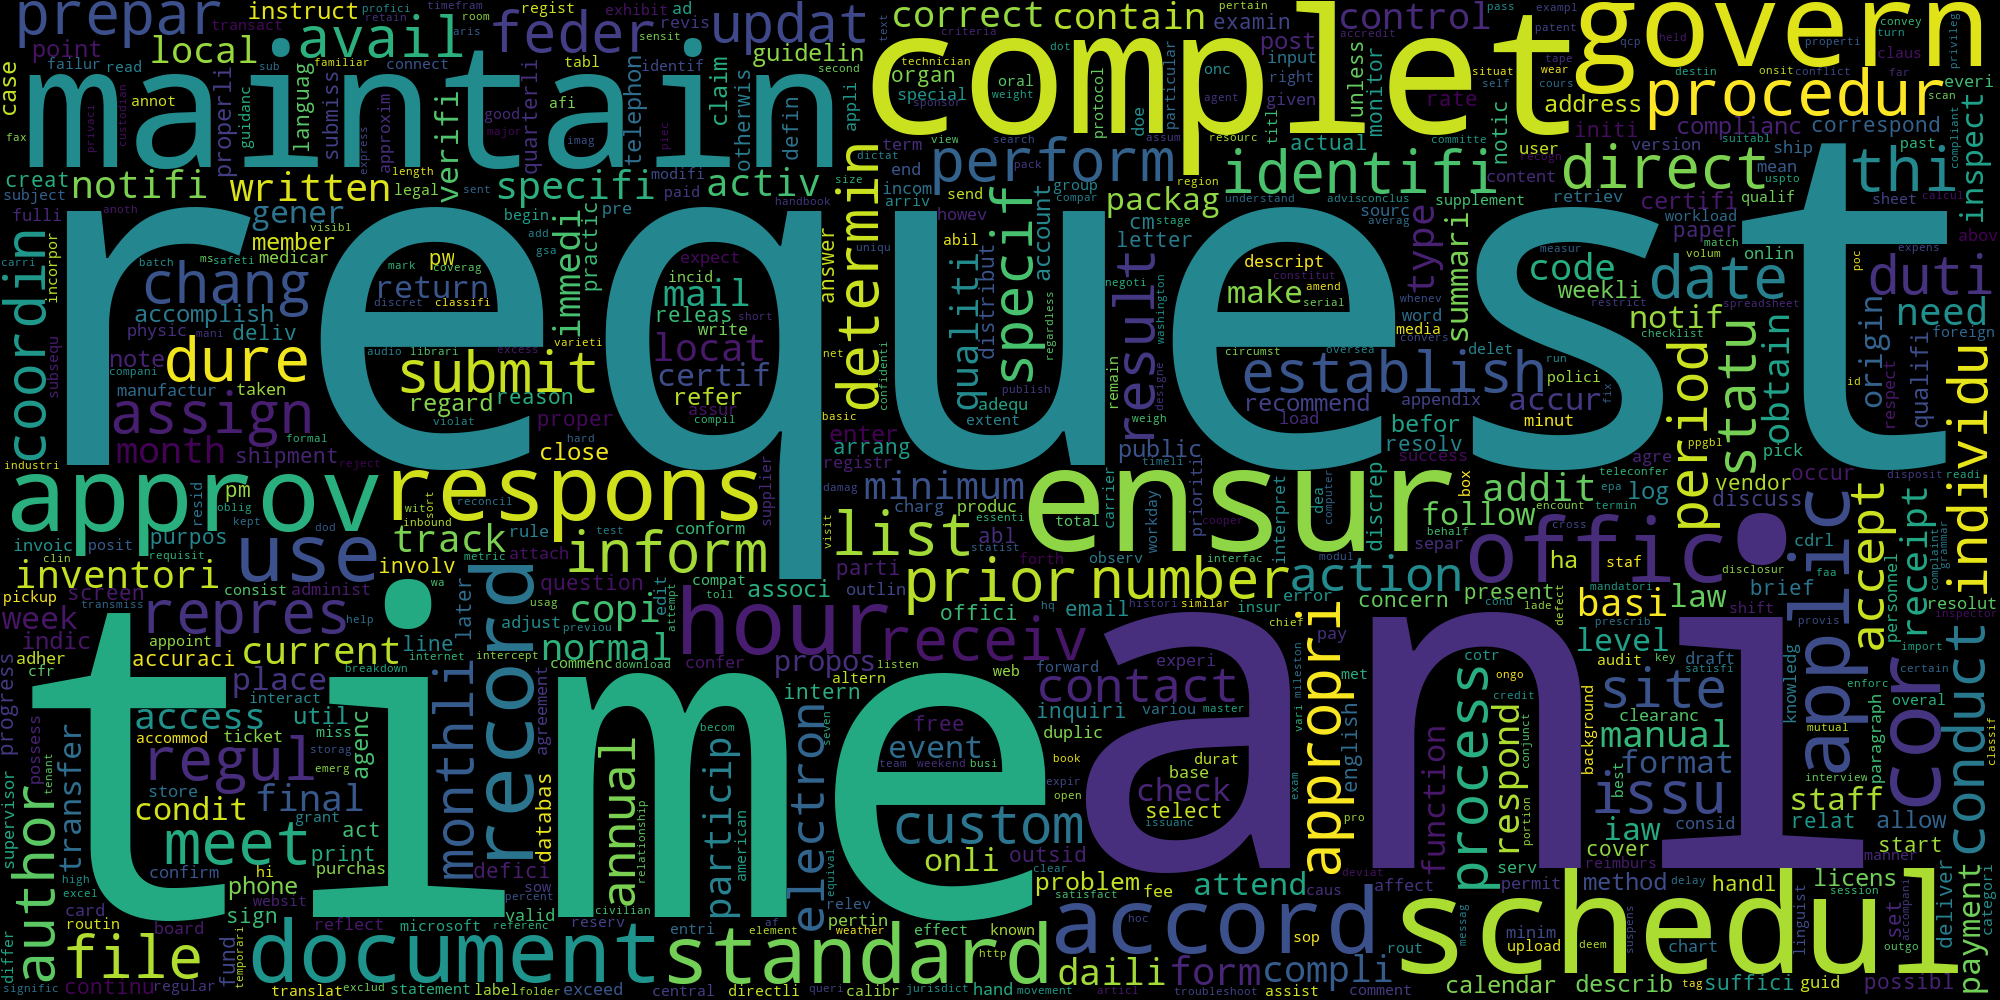

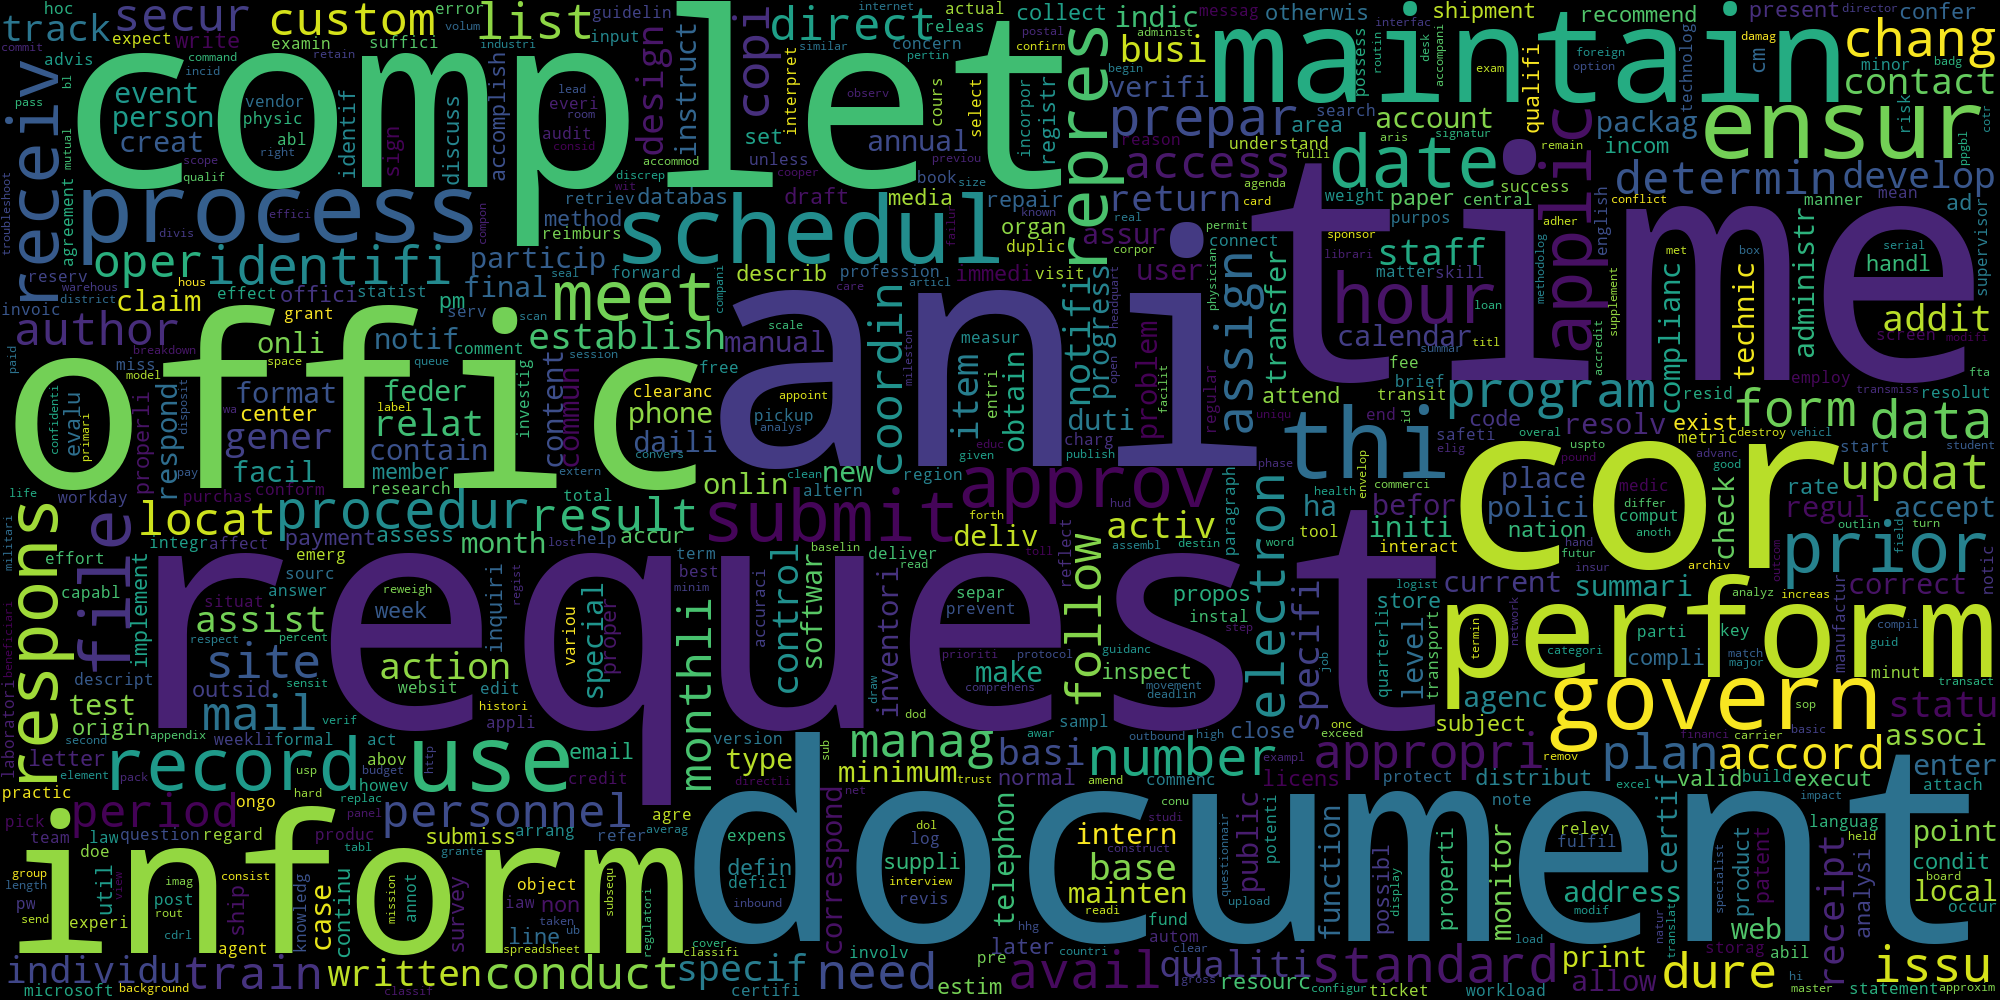

164186 STRENGTH: 1.0
 The contractor will furnish all personnel, equipment, facilities, supplies, services and materials, except as specified herein as government-furnished, for the preparation of personal property of Department of Defense (DOD) personnel for shipment and/or storage and related services through the DPM.   Premove Survey  The contractor will determine the nature of personal property offered for shipment either by physical inspection or telephone survey with the member/employee. The survey will be conducted at a time and date mutually agreed upon between the contractor and the member/employee. Any pack/pickup date changes will be coordinated with the ordering officer.    Weighing  The gross, tare, and net weight of all shipments will be determined through the use of scales properly certified by a state inspector of weights and measures In Accordance With (IAW) the regulations of the state or district having legal jurisdiction over the scales. Personnel designated to oper

In [20]:
topic_i = 3

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))
# wc = WordCloud(background_color="black", max_words=666, width=2000, height=1000)
# wc.fit_words({vocabulary[word_i]: H[topic_i, word_i] for word_i in range(H.shape[1]) if H[topic_i, word_i]})
# plt.imshow(f"../output/wordclouds/{topic_i}_nmf_wordcloud.png", interpolation='bilinear')
# plt.axis("off")
# plt.show()

# plt.imshow(f"../output/wordclouds/{topic_i}_tfidf_wordcloud.png", interpolation='bilinear')
# plt.axis("off")
# plt.show()

for doc, strength in get_top_10_docs(W_normalized, topic_i):
    print(doc_ids[doc], "STRENGTH:", strength)
    print(corpus[doc][2:])
    print("*************************************************************\n")